# CS 636: Assignment 2

## by Derek Jones

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage as sk

In [37]:
def bgr_to_rgb(image):
    b = image[:,:,0]
    g = image[:,:,1]
    r = image[:,:,2]

    image[:,:,0] = r
    image[:,:,1] = b
    image[:,:,2] = g
    
    return image

width = 12
height = 12


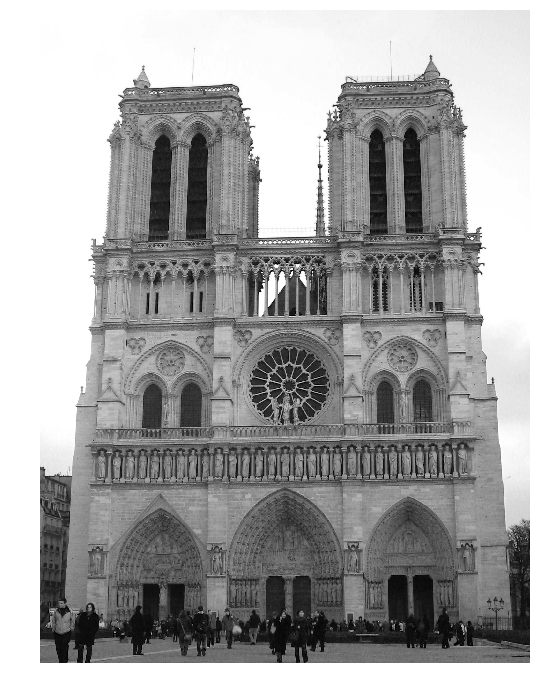

In [38]:

plt.figure(figsize=(width, height))
img1 = cv2.imread('data/dataset_1_notre_dame/image_1.jpg',1)

img1 = bgr_to_rgb(img1)



plt.axis('off')
plt.imshow(img1)
plt.show()

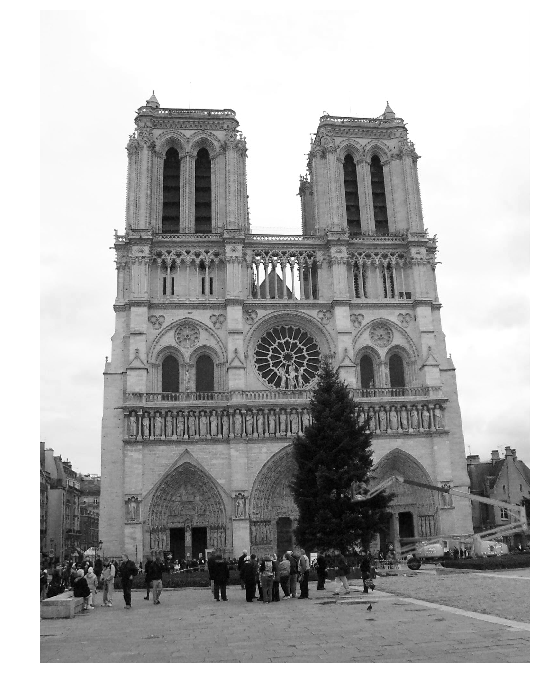

In [39]:

plt.figure(figsize=(width, height))

img2 = cv2.imread('data/dataset_1_notre_dame/image_2.jpg',1)
img2 = bgr_to_rgb(img2)

plt.axis('off')
plt.imshow(img2)
plt.show()

## Keypoints and descriptors

### ORB (Oriented FAST and Rotated BRIEF)
I use the ORB keypoint/feature descriptor method implemented in openCV. SIFT and SURF were included in an external module due to copyright concerns. ORB is more recent and perfroms better in terms of computational time than SIFT and SURF so it seemed reasonable to use. 

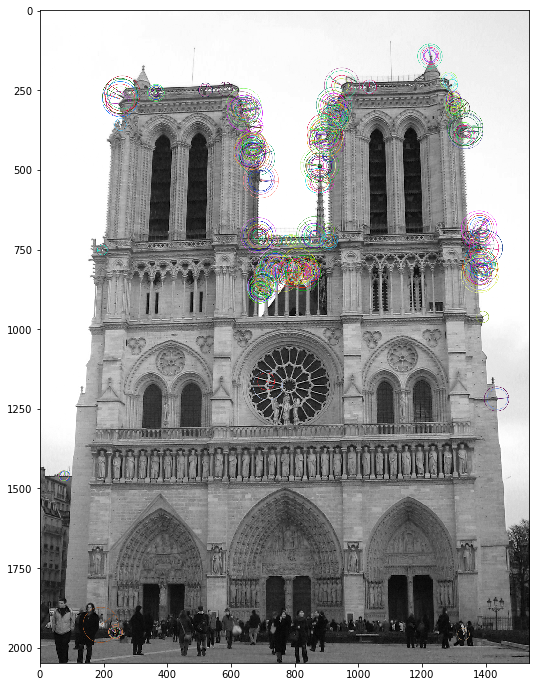

In [40]:
plt.figure(figsize=(width, height))

orb = cv2.ORB_create()
# keypoints and descriptors

kp1 = orb.detect(img1)
kp1, des1 = orb.compute(img1, kp1)
#img1_2 = cimg=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img1_2 = cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img1_2)
plt.show()


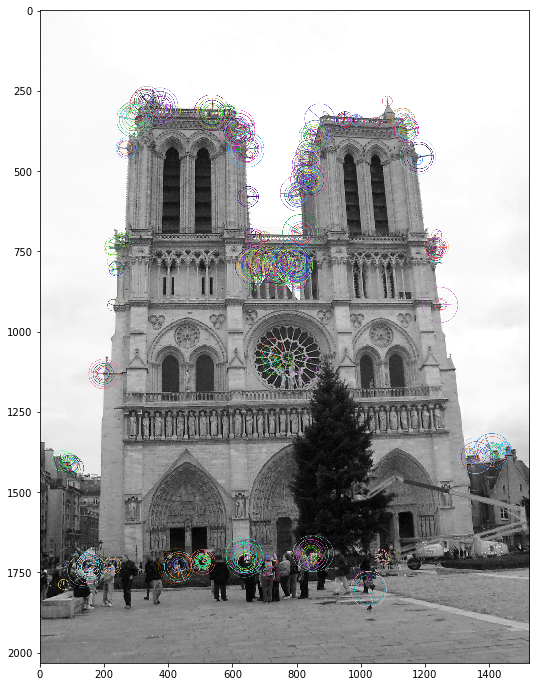

In [41]:
plt.figure(figsize=(width, height))

kp2 = orb.detect(img2)
kp2, des2 = orb.compute(img2, kp2)
#img2_2 = cimg=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_2 = cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2)
plt.show()

## Feature Matching

In [42]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)




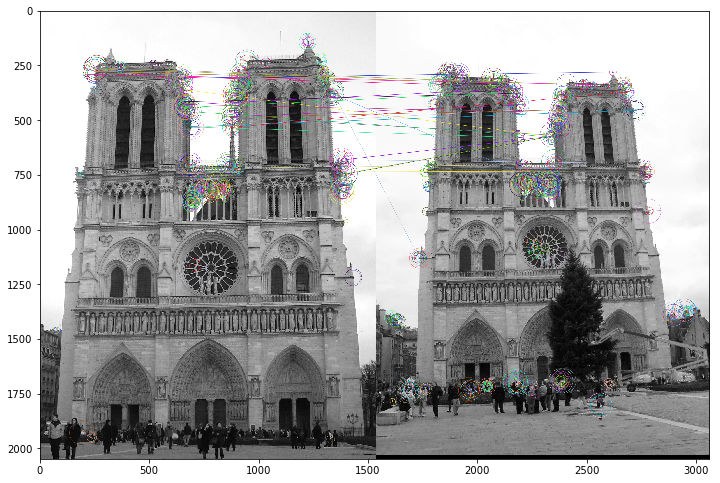

In [43]:
plt.figure(figsize=(width, height))

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:30],None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.savefig('notredame_mactching.png')
plt.show()